In [1]:
%%time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CPU times: user 1.96 s, sys: 383 ms, total: 2.34 s
Wall time: 2.84 s


In [2]:
def plot_total_counts(data_annot, title):
    # Calculate total counts per sample
    total_counts = data_annot.drop(['plate', 'class'], axis=1).sum(axis=1)
    plot_df = pd.DataFrame({
        'total_counts': total_counts,
        'plate': data_annot['plate'],
        'class': data_annot['class']
    })
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='plate', y='total_counts', hue='class', data=plot_df, showfliers=False)
    plt.title(title)
    plt.ylabel('Total Counts per Sample')
    plt.xlabel('Plate')
    plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [3]:
from sklearn.decomposition import PCA

#def plot_pca(data_annot, manifest, title):
def plot_pca(data_annot, title):
    # Remove annotation columns
    X = data_annot.drop(['plate', 'class'], axis=1).values
    y = data_annot['class'].values
    plates = data_annot['plate'].values
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(10, 6))

    # ignore 0.2% of the points in the plot (there is a single very, very stray point in the combat plot)
    x_min, x_max = np.percentile(X_pca[:, 0], [0.1, 99.9])
    y_min, y_max = np.percentile(X_pca[:, 1], [0.1, 99.9])
    #sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, style=plates, s=80, palette='Set1')
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=plates, style=y, s=20, palette='Set1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [4]:
#manifest = pd.read_csv('Counts.normalized.subtracted.csv', nrows=9, header=None).iloc[:, 2:].T.drop(columns=[2])
manifest = pd.read_csv('Counts.csv', nrows=9, header=None).iloc[:, 2:].T.drop(columns=[2])
manifest.columns = ['sample','subject','type','study','group','age','sex','plate']
#manifest['age'] = manifest['age'].astype(int) # _
manifest['plate'] = manifest['plate'].astype(int)
manifest['study'] = manifest['study'].str.replace(r'^Unname.*$', '', regex=True)
manifest['group'] = manifest['group'].str.replace(r'^Unname.*$', '', regex=True)
manifest['age'] = manifest['age'].str.replace(r'^Unname.*$', '', regex=True)
manifest['sex'] = manifest['sex'].str.replace(r'^Unname.*$', '', regex=True)
manifest = manifest.sort_values(by='plate')
manifest

,sample,subject,type,study,group,age,sex,plate
2,14078-01,14078-01,glioma serum,IPS,case,60,M,1
3,14078-01dup,14078-01,glioma serum,IPS,case,60,M,1
4,14118-01,14118-01,glioma serum,IPS,case,61,M,1
5,14118-01dup,14118-01,glioma serum,IPS,case,61,M,1
6,14127-01,14127-01,glioma serum,IPS,case,63,M,1
...,...,...,...,...,...,...,...,...
1146,E097416dup,E097416,glioma serum,PLCO,control,67,F,18
1147,E129145,E129145,glioma serum,PLCO,control,70,M,18
1148,E129145dup,E129145,glioma serum,PLCO,control,70,M,18
1149,PLib18,PLib18,Phage Library,,,,,18


In [5]:
manifest[manifest['subject'].str.contains(r'_1$|_2$', regex=True)]

,sample,subject,type,study,group,age,sex,plate
86,Blank01_1,Blank01_1,input,,,,,1
87,Blank01_2,Blank01_2,input,,,,,1
88,Blank02_1,Blank02_1,input,,,,,1
89,Blank02_2,Blank02_2,input,,,,,1
90,Blank03_1,Blank03_1,input,,,,,1
91,Blank04_1,Blank04_1,input,,,,,1
92,Blank04_2,Blank04_2,input,,,,,1
93,CSE01_1,CSE01_1,commercial serum control,,,,,1
94,CSE01_2,CSE01_2,commercial serum control,,,,,1
95,PLib01_1,PLib01_1,Phage Library,,,,,1


In [6]:
manifest['subject'] = manifest['subject'].str.replace(r'_1$|_2$', '', regex=True)

In [7]:
manifest[manifest['subject'].str.contains(r'PLib', regex=True)].head()

,sample,subject,type,study,group,age,sex,plate
95,PLib01_1,PLib01,Phage Library,,,,,1
96,PLib01_2,PLib01,Phage Library,,,,,1
191,PLib02_1,PLib02,Phage Library,,,,,2
192,PLib02_2,PLib02,Phage Library,,,,,2
287,PLib03,PLib03,Phage Library,,,,,3


In [8]:
# Use only relevant columns from manifest
manifest = manifest[['sample', 'subject', 'type', 'plate']]

# Classify samples based on sample/subject prefix
def classify_sample(row):
    if row['sample'].startswith('CSE') or row['subject'].startswith('CSE'):
        return 'control'
    elif row['sample'].startswith('Blank') or row['subject'].startswith('Blank'):
        return 'blank'
    elif row['sample'].startswith('PLib') or row['subject'].startswith('PLib'):
        return 'phage_library'
    else:
        return 'subject'

manifest['class'] = manifest.apply(classify_sample, axis=1)
manifest

/var/folders/cz/x4nfh_790yn58j4sc5qp7wkc0000gn/T/ipykernel_77682/1918640998.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manifest['class'] = manifest.apply(classify_sample, axis=1)


,sample,subject,type,plate,class
2,14078-01,14078-01,glioma serum,1,subject
3,14078-01dup,14078-01,glioma serum,1,subject
4,14118-01,14118-01,glioma serum,1,subject
5,14118-01dup,14118-01,glioma serum,1,subject
6,14127-01,14127-01,glioma serum,1,subject
...,...,...,...,...,...
1146,E097416dup,E097416,glioma serum,18,subject
1147,E129145,E129145,glioma serum,18,subject
1148,E129145dup,E129145,glioma serum,18,subject
1149,PLib18,PLib18,Phage Library,18,phage_library


In [9]:
%%time

data = pd.read_csv(
    'Counts.csv', header=0, skiprows=range(1, 9), index_col=0).drop(columns=['species']).T.reset_index()
# nrows=10,

data = data.rename(columns={'index':'sample'})

data = data[~data['sample'].isin(['D082062xxx','D082062dupxxx','E045528xxx','E045528dupxxx'])]
data = data.set_index('sample')
data = data.fillna(0)

data

CPU times: user 7.99 s, sys: 3.02 s, total: 11 s
Wall time: 11 s


id,1,2,3,4,5,6,7,8,9,10,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,,,,,,,,,,,,,,,,,,,,,
14078-01,0,0,0,0,1,0,2,0,0,0,...,0,0,1,0,0,0,0,0,0,21
14078-01dup,0,26,0,0,0,0,0,0,0,0,...,72,0,0,10,57,4,0,0,0,2
14118-01,0,0,0,0,1,0,81,0,0,0,...,73,0,0,21,1,0,0,0,0,0
14118-01dup,0,0,0,0,2,0,1,0,0,0,...,0,0,0,0,1,0,5,0,12,0
14127-01,0,161,0,0,0,0,0,0,0,0,...,65,0,1,0,31,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416dup,0,30,0,0,18,0,19,0,0,1,...,3,0,0,2,13,4,0,0,1,2
E129145,0,3,0,0,12,0,22,1,0,3,...,1,0,0,6,5,0,1,1,1,4
E129145dup,0,9,0,0,11,0,20,2,0,1,...,0,0,1,11,12,2,8,2,1,5


In [10]:
#data_annot = data.copy()

manifest_index = manifest.set_index('sample')
# This is slow. Why not just join on sample and then drop the unneeded columns?
#data_annot['plate'] = data_annot.index.map(manifest.set_index('sample')['plate'])
##data_annot['type'] = data_annot.index.map(manifest.set_index('sample')['type'])
#data_annot['class'] = data_annot.index.map(manifest.set_index('sample')['class'])

#data_annot = pd.merge(manifest_index, data, how='inner')
data_annot = manifest_index.join(data, how='left')
data_annot = data_annot.reset_index().set_index(['sample','subject','type']) #,'plate','class'])
data_annot

,,,plate,class,1,2,3,4,5,6,7,8,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,subject,type,,,,,,,,,,,,,,,,,,,,,
14078-01,14078-01,glioma serum,1,subject,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
14078-01dup,14078-01,glioma serum,1,subject,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.0,0.0,0.0,10.0,57.0,4.0,0.0,0.0,0.0,2.0
14118-01,14118-01,glioma serum,1,subject,0.0,0.0,0.0,0.0,1.0,0.0,81.0,0.0,...,73.0,0.0,0.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0
14118-01dup,14118-01,glioma serum,1,subject,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,12.0,0.0
14127-01,14127-01,glioma serum,1,subject,0.0,161.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.0,0.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416dup,E097416,glioma serum,18,subject,0.0,30.0,0.0,0.0,18.0,0.0,19.0,0.0,...,3.0,0.0,0.0,2.0,13.0,4.0,0.0,0.0,1.0,2.0
E129145,E129145,glioma serum,18,subject,0.0,3.0,0.0,0.0,12.0,0.0,22.0,1.0,...,1.0,0.0,0.0,6.0,5.0,0.0,1.0,1.0,1.0,4.0
E129145dup,E129145,glioma serum,18,subject,0.0,9.0,0.0,0.0,11.0,0.0,20.0,2.0,...,0.0,0.0,1.0,11.0,12.0,2.0,8.0,2.0,1.0,5.0


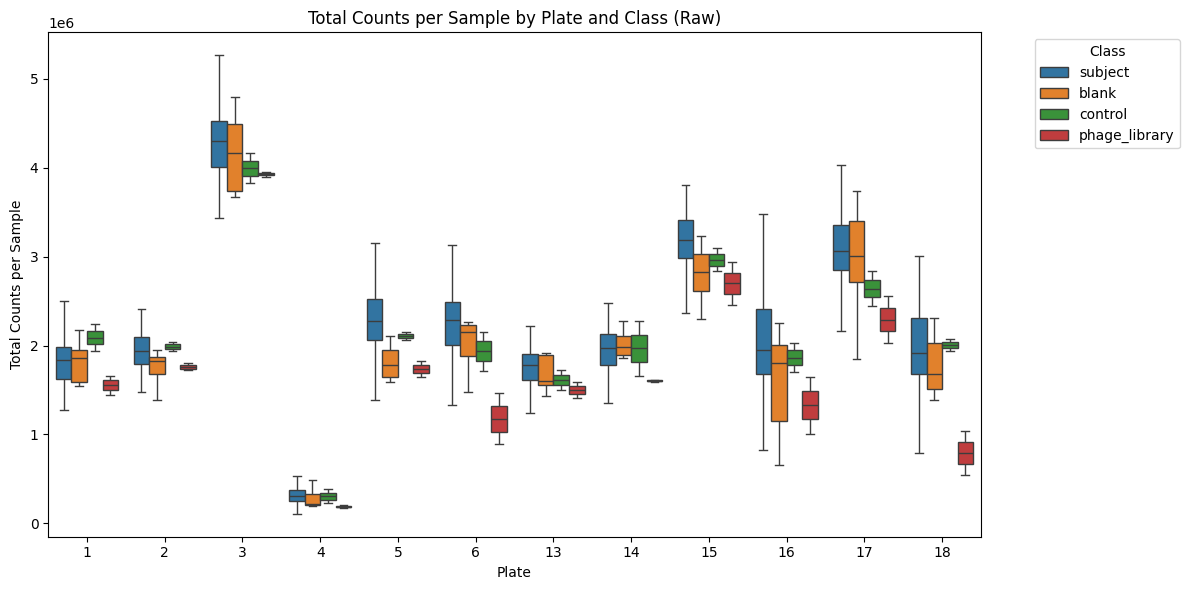

In [11]:
plot_total_counts(data_annot, "Total Counts per Sample by Plate and Class (Raw)")

In [12]:
sums=data.sum(axis='columns')
sums

sample
14078-01       1803049
14078-01dup    1449043
14118-01       1861045
14118-01dup    1836777
14127-01       1568392
                ...   
E097416dup     1971120
E129145        1909742
E129145dup     1754866
PLib18         1034184
PLib18dup       543435
Length: 1145, dtype: int64

In [13]:
n=data.div(sums,axis='index')*1000000
n

id,1,2,3,4,5,6,7,8,9,10,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,,,,,,,,,,,,,,,,,,,,,
14078-01,0.0,0.000000,0.0,0.000000,0.554616,0.0,1.109232,0.000000,0.0,0.000000,...,0.000000,0.000000,0.554616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.646938
14078-01dup,0.0,17.942877,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,49.687966,0.000000,0.000000,6.901106,39.336307,2.760443,0.000000,0.000000,0.000000,1.380221
14118-01,0.0,0.000000,0.0,0.000000,0.537333,0.0,43.523934,0.000000,0.0,0.000000,...,39.225274,0.000000,0.000000,11.283983,0.537333,0.000000,0.000000,0.000000,0.000000,0.000000
14118-01dup,0.0,0.000000,0.0,0.000000,1.088864,0.0,0.544432,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.544432,0.000000,2.722160,0.000000,6.533183,0.000000
14127-01,0.0,102.652908,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,41.443721,0.000000,0.637596,0.000000,19.765467,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416dup,0.0,15.219774,0.0,0.000000,9.131864,0.0,9.639190,0.000000,0.0,0.507326,...,1.521977,0.000000,0.000000,1.014652,6.595235,2.029303,0.000000,0.000000,0.507326,1.014652
E129145,0.0,1.570893,0.0,0.000000,6.283571,0.0,11.519881,0.523631,0.0,1.570893,...,0.523631,0.000000,0.000000,3.141786,2.618155,0.000000,0.523631,0.523631,0.523631,2.094524
E129145dup,0.0,5.128597,0.0,0.000000,6.268285,0.0,11.396882,1.139688,0.0,0.569844,...,0.000000,0.000000,0.569844,6.268285,6.838129,1.139688,4.558753,1.139688,0.569844,2.849220


In [14]:
n = manifest_index.join(n, how='left')
n = n.reset_index().set_index(['sample','subject','type']) #,'plate','class'])
n

,,,plate,class,1,2,3,4,5,6,7,8,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,subject,type,,,,,,,,,,,,,,,,,,,,,
14078-01,14078-01,glioma serum,1,subject,0.0,0.000000,0.0,0.000000,0.554616,0.0,1.109232,0.000000,...,0.000000,0.000000,0.554616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.646938
14078-01dup,14078-01,glioma serum,1,subject,0.0,17.942877,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,49.687966,0.000000,0.000000,6.901106,39.336307,2.760443,0.000000,0.000000,0.000000,1.380221
14118-01,14118-01,glioma serum,1,subject,0.0,0.000000,0.0,0.000000,0.537333,0.0,43.523934,0.000000,...,39.225274,0.000000,0.000000,11.283983,0.537333,0.000000,0.000000,0.000000,0.000000,0.000000
14118-01dup,14118-01,glioma serum,1,subject,0.0,0.000000,0.0,0.000000,1.088864,0.0,0.544432,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.544432,0.000000,2.722160,0.000000,6.533183,0.000000
14127-01,14127-01,glioma serum,1,subject,0.0,102.652908,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,41.443721,0.000000,0.637596,0.000000,19.765467,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416dup,E097416,glioma serum,18,subject,0.0,15.219774,0.0,0.000000,9.131864,0.0,9.639190,0.000000,...,1.521977,0.000000,0.000000,1.014652,6.595235,2.029303,0.000000,0.000000,0.507326,1.014652
E129145,E129145,glioma serum,18,subject,0.0,1.570893,0.0,0.000000,6.283571,0.0,11.519881,0.523631,...,0.523631,0.000000,0.000000,3.141786,2.618155,0.000000,0.523631,0.523631,0.523631,2.094524
E129145dup,E129145,glioma serum,18,subject,0.0,5.128597,0.0,0.000000,6.268285,0.0,11.396882,1.139688,...,0.000000,0.000000,0.569844,6.268285,6.838129,1.139688,4.558753,1.139688,0.569844,2.849220


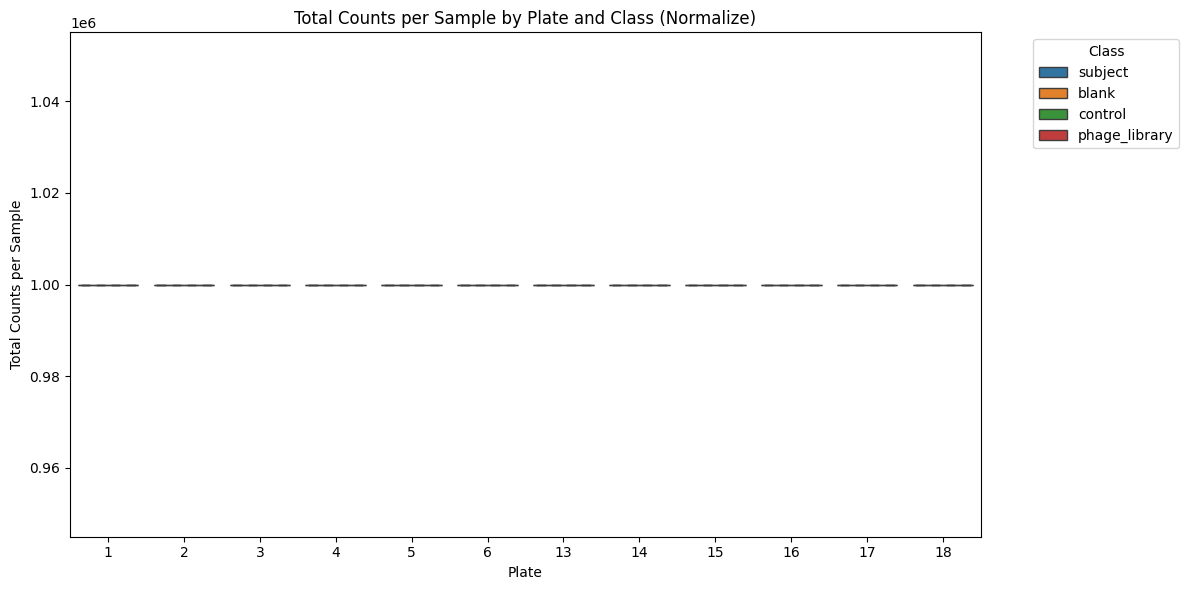

In [15]:
plot_total_counts(n, "Total Counts per Sample by Plate and Class (Normalize)")

In [16]:
n = n.reset_index().set_index(['sample','subject','type','plate','class'])

In [17]:
ss=[]
for plate in n.index.get_level_values('plate').unique():
  a = n.loc[(n.index.get_level_values('plate') == plate),:]
  ss.append(
    a.sub(
      a.loc[(a.index.get_level_values('type') == 'input'),:].median(axis='index'), axis='columns').clip(lower=0)
  )

s=pd.concat(ss,axis=1)
s=s.sort_index(axis=1)
s=s.fillna(0)
s

,,,,,1,1,1,1,1,1,1,1,1,1,...,128287,128287,128287,128287,128287,128287,128287,128287,128287,128287
sample,subject,type,plate,class,,,,,,,,,,,,,,,,,,,,,
14078-01,14078-01,glioma serum,1,subject,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.646938
14078-01dup,14078-01,glioma serum,1,subject,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.380221
14118-01,14118-01,glioma serum,1,subject,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
14118-01dup,14118-01,glioma serum,1,subject,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
14127-01,14127-01,glioma serum,1,subject,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416dup,E097416,glioma serum,18,subject,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.762939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
E129145,E129145,glioma serum,18,subject,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.842811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
E129145dup,E129145,glioma serum,18,subject,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.597508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


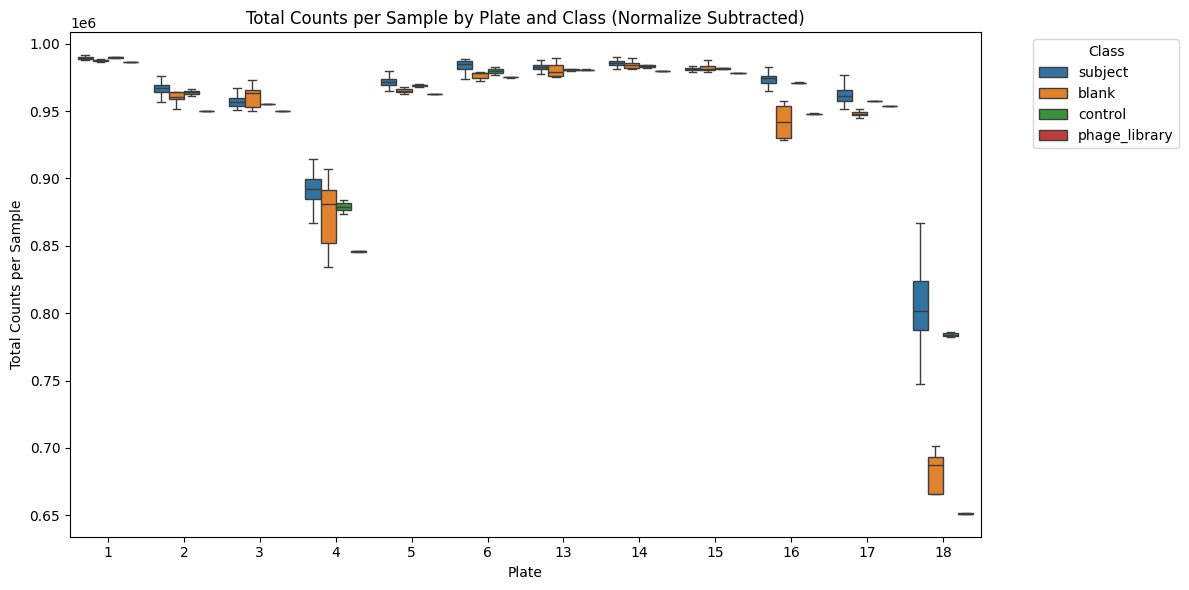

In [18]:
s = s.reset_index().set_index(['sample','subject','type']) #,'plate','class'])
plot_total_counts(s, "Total Counts per Sample by Plate and Class (Normalize Subtracted)")

In [19]:
#data_annot = s.copy().fillna(0)
#data_annot = data_annot.reset_index().drop(['type','plate','class'],axis='columns').set_index('sample')
data_annot

,,,plate,class,1,2,3,4,5,6,7,8,...,128278,128279,128280,128281,128282,128283,128284,128285,128286,128287
sample,subject,type,,,,,,,,,,,,,,,,,,,,,
14078-01,14078-01,glioma serum,1,subject,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
14078-01dup,14078-01,glioma serum,1,subject,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.0,0.0,0.0,10.0,57.0,4.0,0.0,0.0,0.0,2.0
14118-01,14118-01,glioma serum,1,subject,0.0,0.0,0.0,0.0,1.0,0.0,81.0,0.0,...,73.0,0.0,0.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0
14118-01dup,14118-01,glioma serum,1,subject,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,12.0,0.0
14127-01,14127-01,glioma serum,1,subject,0.0,161.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.0,0.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E097416dup,E097416,glioma serum,18,subject,0.0,30.0,0.0,0.0,18.0,0.0,19.0,0.0,...,3.0,0.0,0.0,2.0,13.0,4.0,0.0,0.0,1.0,2.0
E129145,E129145,glioma serum,18,subject,0.0,3.0,0.0,0.0,12.0,0.0,22.0,1.0,...,1.0,0.0,0.0,6.0,5.0,0.0,1.0,1.0,1.0,4.0
E129145dup,E129145,glioma serum,18,subject,0.0,9.0,0.0,0.0,11.0,0.0,20.0,2.0,...,0.0,0.0,1.0,11.0,12.0,2.0,8.0,2.0,1.0,5.0


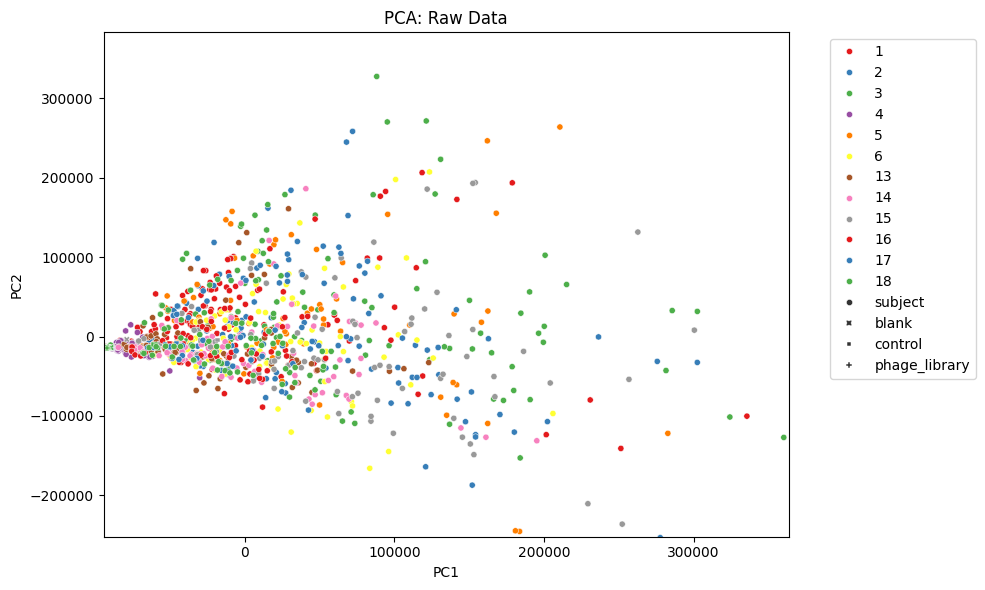

In [20]:
# PCA plots for each step
plot_pca(data_annot.reset_index().set_index('sample').drop(['subject','type'],axis='columns').fillna(0), "PCA: Raw Data")

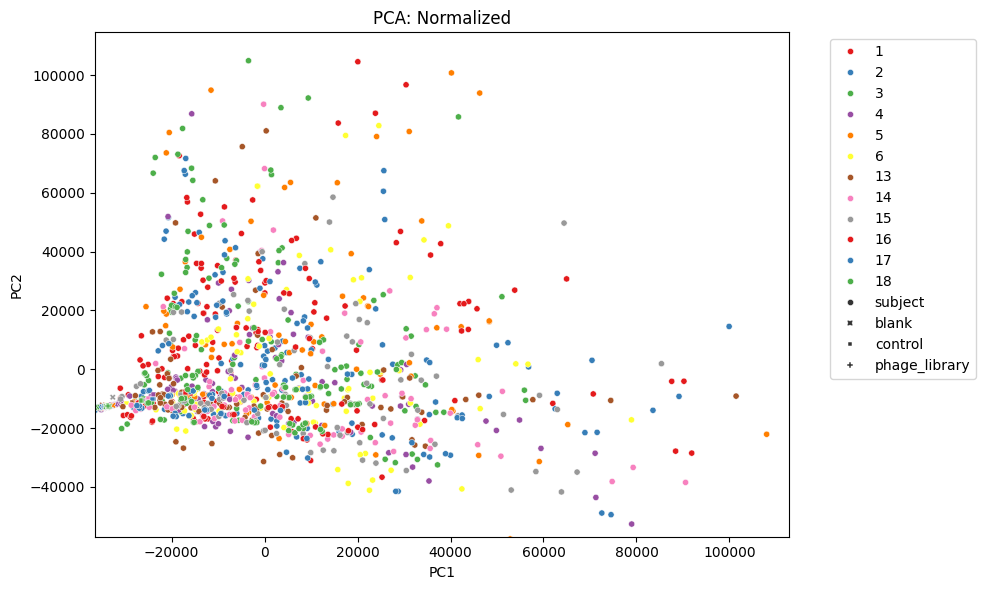

In [21]:
plot_pca(n.reset_index().set_index('sample').drop(['subject','type'],axis='columns').fillna(0), "PCA: Normalized")

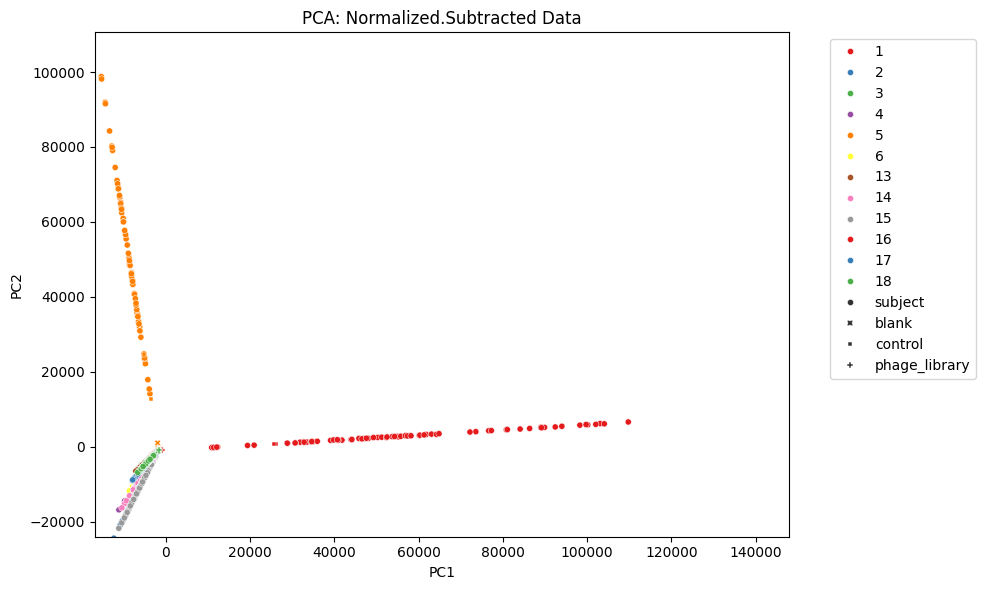

In [22]:
plot_pca(s.reset_index().set_index('sample').drop(['subject','type'],axis='columns').fillna(0), "PCA: Normalized.Subtracted Data")